#**Name: Nader Mohamed Elhadedy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# helping libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **- Inspecting and cleaning Dataset**

In [ ]:
df = pd.read_csv("weatherHistory.csv")

In [ ]:
df.shape

(96453, 12)

In [ ]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('######################################################')

2015-01-05 21:00:00.000 +0100    1
2009-10-05 18:00:00.000 +0200    1
2008-09-10 05:00:00.000 +0200    1
2014-11-22 16:00:00.000 +0100    1
2008-06-16 14:00:00.000 +0200    1
                                ..
2015-09-20 03:00:00.000 +0200    1
2008-02-23 11:00:00.000 +0100    1
2007-09-24 09:00:00.000 +0200    1
2010-11-11 01:00:00.000 +0100    1
2016-02-26 19:00:00.000 +0100    1
Name: Formatted Date, Length: 96429, dtype: int64
######################################################
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy         

In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

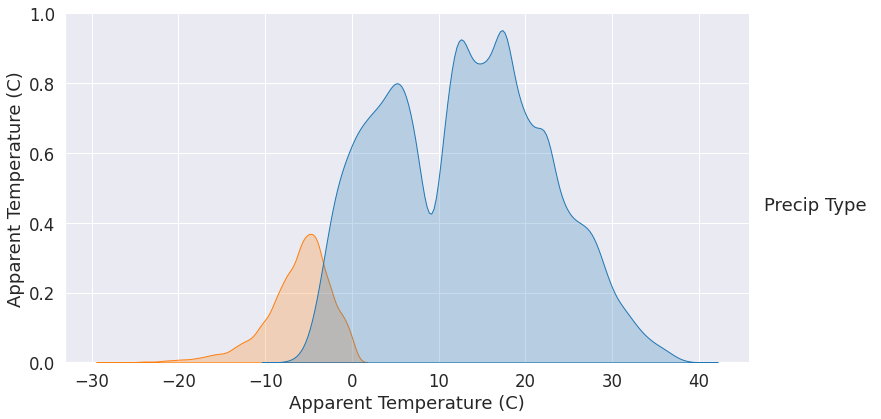

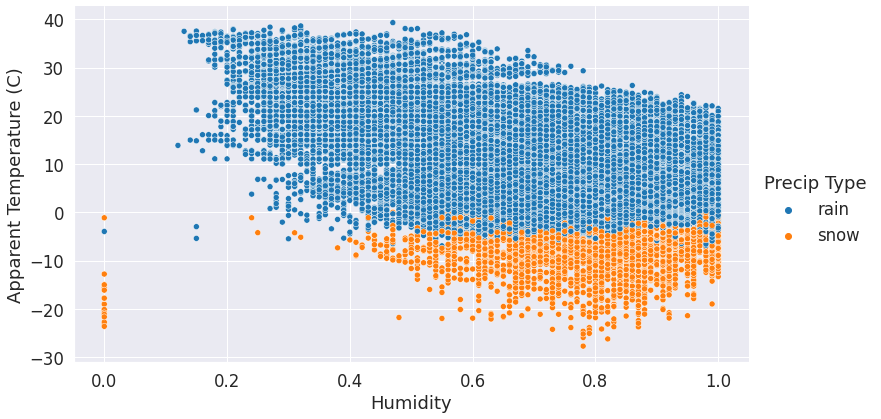

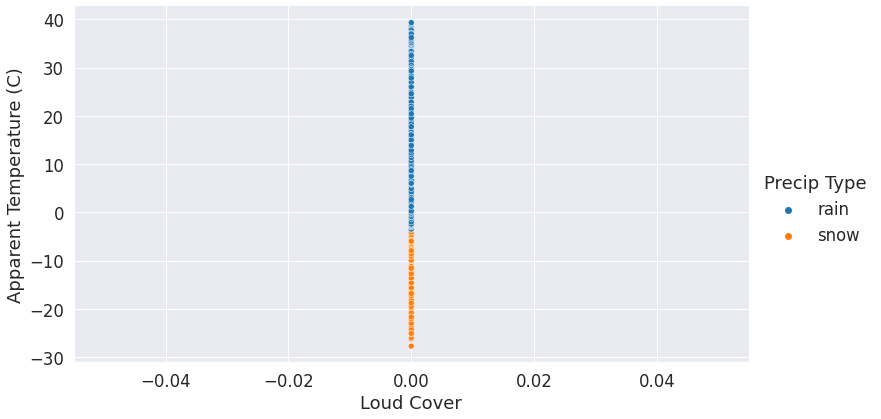

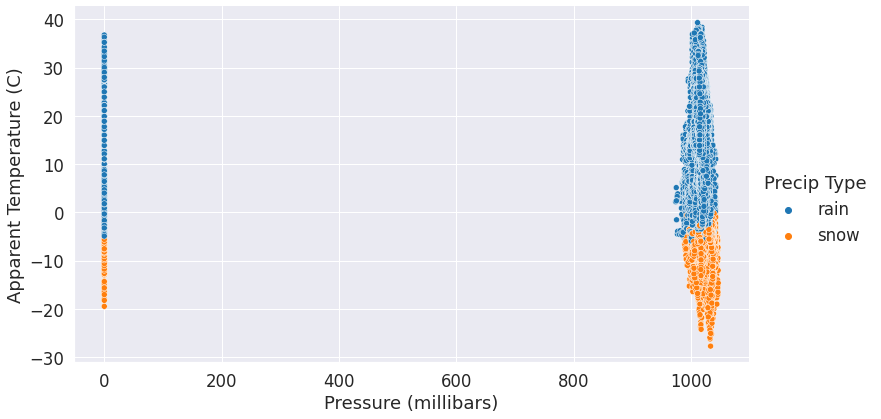

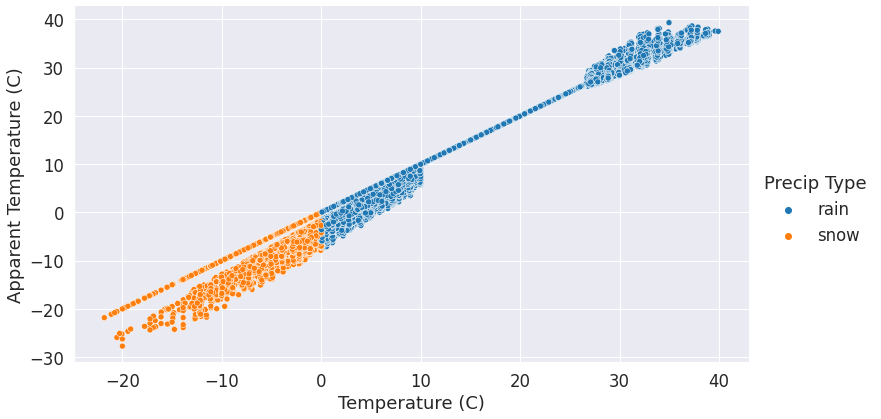

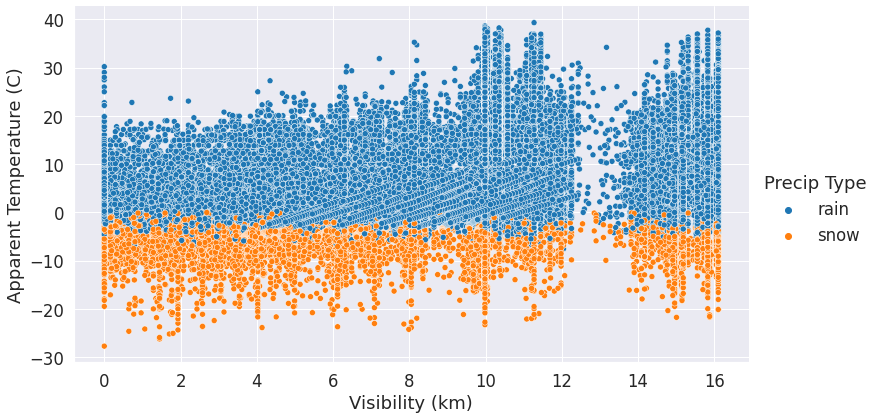

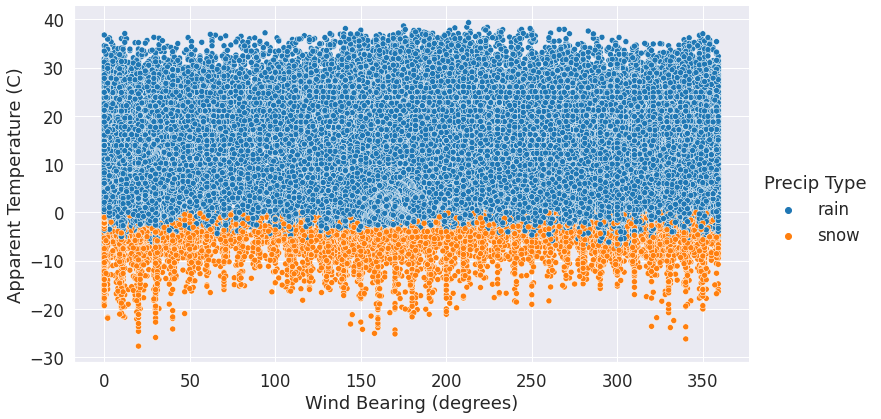

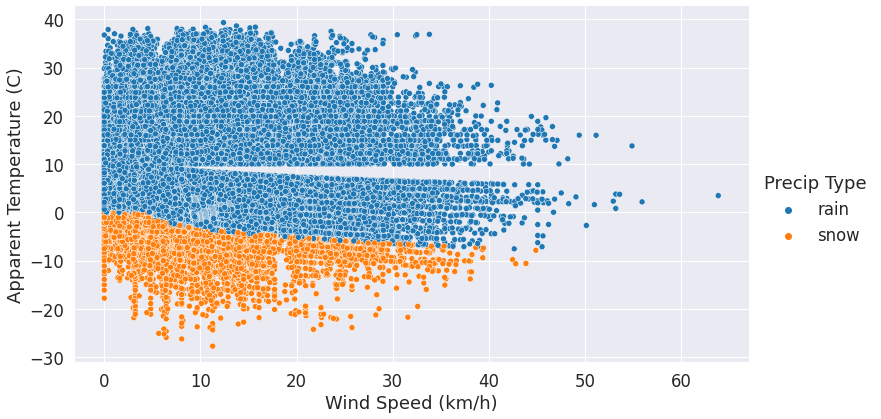

In [ ]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
for col in df.columns.difference(["Formatted Date", "Summary", "Precip Type", "Daily Summary"]):
  ax = sns.pairplot(data=df, x_vars=col, y_vars=["Apparent Temperature (C)"], height=6, aspect=9/5, hue='Precip Type')

<hr>

# **- Playing with features**

In [ ]:
_ = df.rename(columns={"Formatted Date": "Date"}, inplace=True)

In [ ]:
 df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [ ]:
df.dtypes

Date                        datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [ ]:
df['Hour'] = df.Date.dt.hour
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

In [ ]:
df.drop(['Loud Cover', 'Daily Summary', 'Date'], axis=1, inplace=True)

In [ ]:
precip_cols = pd.get_dummies(df['Precip Type'], prefix='precip_')

In [ ]:
df = df.drop('Precip Type',axis = 1)
df = df.join(precip_cols)

In [ ]:
most_important_summaries = list((df['Summary'].value_counts()[:8]).index)

In [ ]:
most_important_summaries

['Partly Cloudy',
 'Mostly Cloudy',
 'Overcast',
 'Clear',
 'Foggy',
 'Breezy and Overcast',
 'Breezy and Mostly Cloudy',
 'Breezy and Partly Cloudy']

In [ ]:
unwanted_summaries = np.invert(df.Summary.isin(most_important_summaries))

df.drop(df[unwanted_summaries].index, inplace=True)

In [ ]:
df.shape

(95868, 13)

In [ ]:
summary_cols = pd.get_dummies(df['Summary'], prefix='summary')
df = df.drop('Summary',axis = 1)
df = df.join(summary_cols)

In [ ]:
df.shape

(95868, 20)

In [ ]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Hour', 'Month', 'Year', 'precip__rain',
       'precip__snow', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy'],
      dtype='object')

In [ ]:
(df['Pressure (millibars)'] == 0.0).sum()

1252

In [ ]:
df['Pressure (millibars)'] = df['Pressure (millibars)'].replace(0.0, np.nan).fillna(method='ffill')

In [ ]:
(df['Pressure (millibars)'] == 0.0).sum()

0

<hr>

# **- Handling features and Taking Decisions**

In [ ]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Hour', 'Month', 'Year', 'precip__rain',
       'precip__snow', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

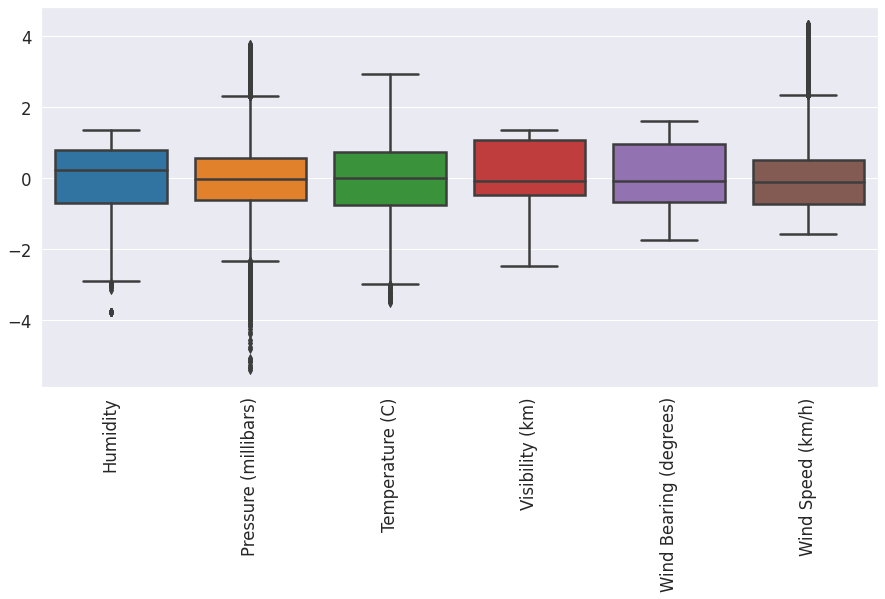

In [ ]:
target_cols =  df.columns.difference(['Date', 'Apparent Temperature (C)', 'Hour', 'Month', 'Year', 'precip__rain',
       'precip__snow', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy'])

plt.figure(figsize=(15,7))
_ = sns.boxplot(data=scaled_df[target_cols], width=0.8)
plt.xticks(rotation=90)
plt.show()

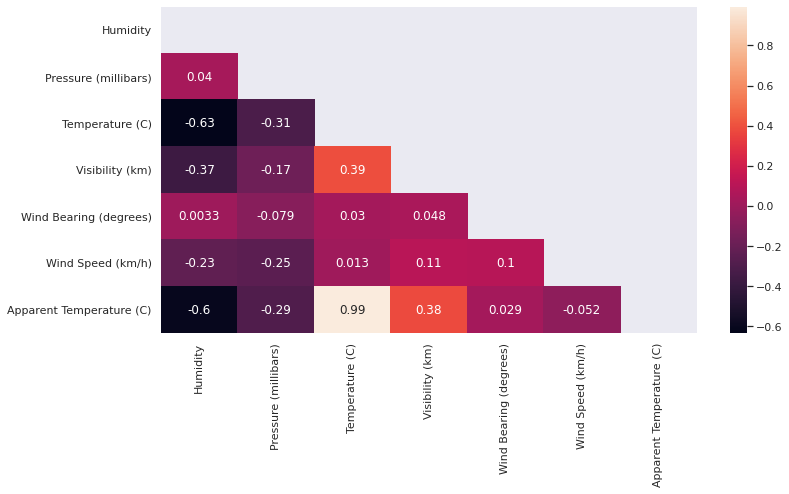

In [ ]:
corr= df[list(target_cols)+['Apparent Temperature (C)']].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.set()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

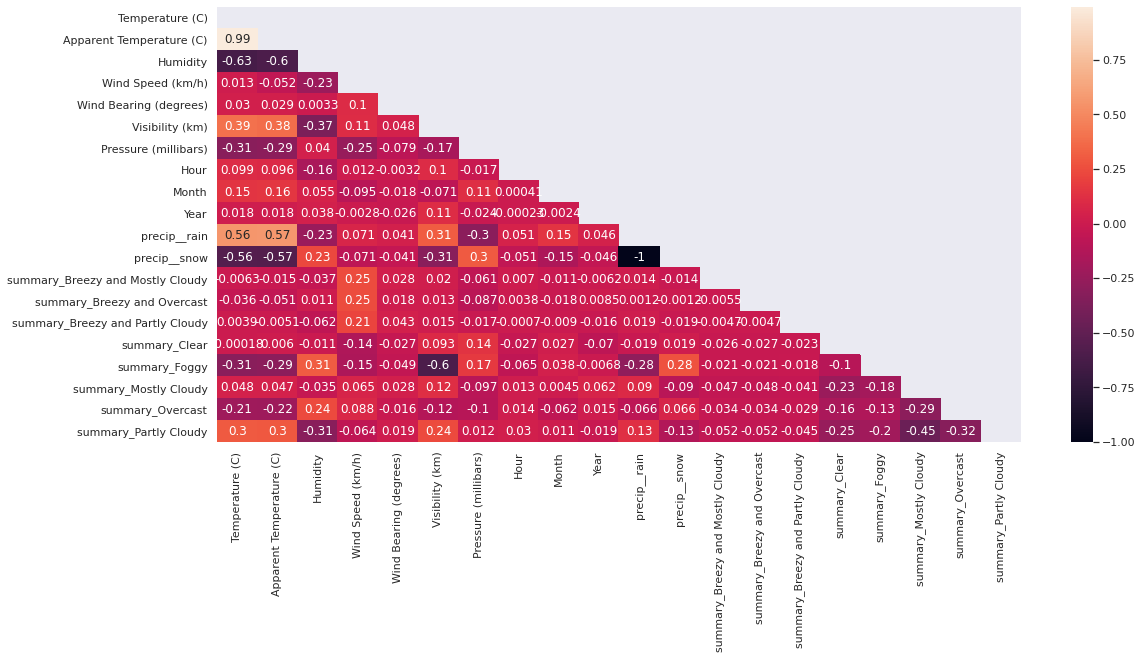

In [ ]:
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.set()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

<hr>

# **- Implementing different regression models**

In [ ]:
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## **1) Simple Linear Regression**

>## **Choosing most correlated feature**

In [ ]:
X = np.array(df['Temperature (C)']).reshape(-1,1)
y = df['Apparent Temperature (C)']

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.score(X,y)

0.9855153892306607

In [ ]:
print(linear_model.intercept_)
print(linear_model.coef_)

-2.3987643525448767
[1.11142614]


In [ ]:
Xs = sm.add_constant(X)
results = sm.OLS(y, Xs).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.986
Model:                                  OLS   Adj. R-squared:                  0.986
Method:                       Least Squares   F-statistic:                 6.523e+06
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:02:54   Log-Likelihood:            -1.6016e+05
No. Observations:                     95868   AIC:                         3.203e+05
Df Residuals:                         95866   BIC:                         3.203e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

>>> # **f-statistic and p-value are good.**

<hr>

>## **Trying another feature**

In [ ]:
X = np.array(df['Humidity']).reshape(-1,1)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.score(X,y)

0.3636015267028274

In [ ]:
print(linear_model.intercept_)
print(linear_model.coef_)

35.18345379637249
[-33.09202969]


In [ ]:
Xs = sm.add_constant(X)
results = sm.OLS(y, Xs).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.364
Model:                                  OLS   Adj. R-squared:                  0.364
Method:                       Least Squares   F-statistic:                 5.477e+04
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:03:05   Log-Likelihood:            -3.4148e+05
No. Observations:                     95868   AIC:                         6.830e+05
Df Residuals:                         95866   BIC:                         6.830e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

>>> # **statistics are good but score is very low.**



---





---



> # **Trying 3 models with different features each time**

# **A) Temperature, Humidity, Visibility**

In [ ]:
features = ['Temperature (C)', 'Humidity', 'Visibility (km)']

## **2) Multiple Linear Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
multiple_model = LinearRegression()
multiple_model.fit(X,y)
multiple_model.score(X,y)

0.9865497596474742

In [ ]:
print(multiple_model.intercept_)
print(multiple_model.coef_)

1.9440139521044714e-16
[ 1.01993781  0.04033619 -0.00431579]


In [ ]:
Xs = sm.add_constant(X)
results = sm.OLS(y, Xs).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.987
Model:                                  OLS   Adj. R-squared:                  0.987
Method:                       Least Squares   F-statistic:                 2.344e+06
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:03:29   Log-Likelihood:                 70505.
No. Observations:                     95868   AIC:                        -1.410e+05
Df Residuals:                         95864   BIC:                        -1.410e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

<hr>

## **3) Polynomial Regression**

In [ ]:
poly2 = PolynomialFeatures(degree=2)
poly4 = PolynomialFeatures(degree=4)

x1 = scaled_df['Temperature (C)']
x2 = poly4.fit_transform(np.array(scaled_df['Visibility (km)']).reshape(-1,1))
x3 = poly2.fit_transform(np.array(scaled_df['Humidity']).reshape(-1,1))

In [ ]:
X = np.c_[x1,x2,-x3]

In [ ]:
X = pd.DataFrame(X, columns=['temp', 'vis0', 'vis1', 'vis2', 'vis3', 'vis4', 'hum0', 'hum1', 'hum2'])

In [ ]:
polynomial_model = LinearRegression(False)
polynomial_model.fit(X,y)
polynomial_model.score(X,y)

0.9868217135421061

In [ ]:
print(polynomial_model.intercept_)
print(polynomial_model.coef_)

0.0
[ 1.02413435e+00  7.10712927e-04  1.95346729e-04  1.20524320e-02
 -3.32574586e-03 -8.69142623e-04 -7.10712927e-04 -2.75632257e-02
  1.27528860e-02]


In [ ]:
results = sm.OLS(y, X).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.987
Model:                                  OLS   Adj. R-squared:                  0.987
Method:                       Least Squares   F-statistic:                 1.025e+06
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:03:51   Log-Likelihood:                 71484.
No. Observations:                     95868   AIC:                        -1.430e+05
Df Residuals:                         95860   BIC:                        -1.429e+05
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

---

## **4) Support Vector Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(X,y)
svr_model.score(X,y)

0.9836301272624055

In [ ]:
print(svr_model.intercept_)
print(svr_model.coef_)

[-0.03929965]
[[ 0.98348228  0.02200299 -0.02148911]]


In [ ]:
M = X.shape[1] # number of columns
N = len(df) # number of rows
R2 = svr_model.score(X,y)

In [ ]:
R2_adj = 1-(1-R2)*((N-1) / (N-M-1))
R2_adj

0.9836296149781464

>>> # **Model 2 and 4 can be used.**

---

# **B) Temperature, Humidity, Visibility, Pressure, Precip Type**

In [ ]:
features = ['Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)', 'precip__rain', 'precip__snow']

> # **Using models 2 & 4**

## **2) Multiple Linear Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
multiple_model = LinearRegression()
multiple_model.fit(X,y)
multiple_model.score(X,y)

0.9873254612464532

In [ ]:
print(multiple_model.intercept_)
print(multiple_model.coef_)

2.1981691406759082e-16
[ 1.0291895   0.04727701 -0.00238108  0.03023004  0.00340704 -0.00340704]


In [ ]:
Xs = sm.add_constant(X)
results = sm.OLS(y, Xs).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.987
Model:                                  OLS   Adj. R-squared:                  0.987
Method:                       Least Squares   F-statistic:                 1.493e+06
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:05:51   Log-Likelihood:                 73353.
No. Observations:                     95868   AIC:                        -1.467e+05
Df Residuals:                         95862   BIC:                        -1.466e+05
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

<hr>

## **4) Support Vector Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(X,y)
svr_model.score(X,y)

0.9860716470143565

In [ ]:
print(svr_model.intercept_)
print(svr_model.coef_)

[-0.02494597]
[[ 1.01468992  0.03672036 -0.01372949  0.02867615 -0.00253112  0.00253112]]


In [ ]:
M = X.shape[1] # number of columns
N = len(df) # number of rows
R2 = svr_model.score(X,y)

In [ ]:
R2_adj = 1-(1-R2)*((N-1) / (N-M-1))
R2_adj

0.9860707752300237

>>> # **There is a slight difference in score between both models in favor of model 2.**

---

# **C) Temperature, Humidity, Visibility, Pressure, Precip Type, Hour, Month, Year**

In [ ]:
features = ['Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)', 'precip__rain', 'precip__snow', 'Hour', 'Month', 'Year']

## **2) Multiple Linear Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
multiple_model = LinearRegression()
multiple_model.fit(X,y)
multiple_model.score(X,y)

0.9873390449817324

In [ ]:
print(multiple_model.intercept_)
print(multiple_model.coef_)

2.2083095837625277e-16
[ 1.03030448  0.04849185 -0.00247149  0.03088417  0.00355072 -0.00355072
  0.00169651 -0.00266439 -0.00220437]


In [ ]:
Xs = sm.add_constant(X)
results = sm.OLS(y, Xs).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.987
Model:                                  OLS   Adj. R-squared:                  0.987
Method:                       Least Squares   F-statistic:                 9.344e+05
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:14:52   Log-Likelihood:                 73404.
No. Observations:                     95868   AIC:                        -1.468e+05
Df Residuals:                         95859   BIC:                        -1.467e+05
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

<hr>

## **4) Support Vector Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(X,y)
svr_model.score(X,y)

0.9860339386398398

In [ ]:
print(svr_model.intercept_)
print(svr_model.coef_)

[-0.02544511]
[[ 1.0162093   0.03791837 -0.01433666  0.02986391 -0.00242944  0.00242944
   0.00125979 -0.00435274  0.00110792]]


In [ ]:
M = X.shape[1] # number of columns
N = len(df) # number of rows
R2 = svr_model.score(X,y)

In [ ]:
R2_adj = 1-(1-R2)*((N-1) / (N-M-1))
R2_adj

0.9860326273820185

> # **Same results as above, maybe the suitable evaluation metric for the problem has the final word between models.**

---

# **D) Temperature, Humidity, Visibility, Pressure, Precip Type, Hour, Month, Year**

> # **Using most of the features in the dataframe**

In [ ]:
features = ['Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)', 'precip__rain', 'precip__snow', 'Hour', 'Month', 'Year', 'summary_Breezy and Mostly Cloudy',
       'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy',
       'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy']

## **2) Multiple Linear Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
multiple_model = LinearRegression()
multiple_model.fit(X,y)
multiple_model.score(X,y)

0.987657138683554

In [ ]:
print(multiple_model.intercept_)
print(multiple_model.coef_)

2.1504665335464959e-16
[ 1.02570167e+00  4.63908299e-02  1.71874780e-03  2.67660896e-02
  4.36709587e-03 -4.36709587e-03  2.00965054e-03 -2.49798451e-03
 -2.38643630e-03 -5.21465475e-03 -1.19822000e-02 -5.92389392e-03
  2.66251409e-03  9.03733791e-03  7.73797363e-04 -6.44233633e-03
  1.08493265e-03]


In [ ]:
Xs = sm.add_constant(X)
results = sm.OLS(y, Xs).fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.988
Model:                                  OLS   Adj. R-squared:                  0.988
Method:                       Least Squares   F-statistic:                 5.113e+05
Date:                      Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                              00:19:09   Log-Likelihood:                 74624.
No. Observations:                     95868   AIC:                        -1.492e+05
Df Residuals:                         95852   BIC:                        -1.491e+05
Df Model:                                15                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

<hr>

## **4) Support Vector Regression**

In [ ]:
X = scaled_df[features]
y = scaled_df['Apparent Temperature (C)']

In [ ]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(X,y)
svr_model.score(X,y)

0.9866836036841627

In [ ]:
print(svr_model.intercept_)
print(svr_model.coef_)

[-0.0194932]
[[ 1.01454880e+00  3.90790765e-02 -1.30226513e-02  2.68651585e-02
  -1.70002892e-03  1.70002892e-03  1.48657027e-03 -3.38375753e-03
   1.13074423e-03 -3.16976797e-03 -7.11167403e-03 -4.00537670e-03
   3.64296728e-03  1.43563004e-03 -9.16926481e-04 -6.54343260e-03
   5.04234044e-03]]


In [ ]:
M = X.shape[1] # number of columns
N = len(df) # number of rows
R2 = svr_model.score(X,y)

In [ ]:
R2_adj = 1-(1-R2)*((N-1) / (N-M-1))
R2_adj

0.9866812418819992

> # **SVR is taking large time running when facing too many features, so model 2 is better overall as there is no difference.**

---

> # **There is no difference when trying different metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y, multiple_model.predict(X))

0.08527375213116724

In [ ]:
mean_absolute_error(y, svr_model.predict(X))

0.0927183565538421

---

In [ ]:
mean_squared_error(y, multiple_model.predict(X))

0.01234286131644599

In [ ]:
mean_squared_error(y, svr_model.predict(X))

0.013316396315837278

---

> *We can try other methods like mapping numerical features with categories such as temperature can be categorized for patterns in <=10, >= 27 or visibility in > 12, <= 13.5. Also we can map features like hour to two features day and night based on hour value and month to four categories of seasons and more but the actual found features are performing well until now.*

---